In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv")

In [2]:
print(df.head())
#ilk 5 eleman

     Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0


In [3]:
print(df.tail())
#son 5 eleman

        Month  Sunspots
2815  1983-08      71.8
2816  1983-09      50.3
2817  1983-10      55.8
2818  1983-11      33.3
2819  1983-12      33.4


In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())
#tarih kısmında düzenleme-Bu işlemin her ayın ilk gününü otomatik olarak ekler

       Month  Sunspots
0 1749-01-01      58.0
1 1749-02-01      62.6
2 1749-03-01      70.0
3 1749-04-01      55.7
4 1749-05-01      85.0


In [5]:
df.index = df['Month']
del df['Month']
print(df.head())
#işlem yaparken kolaylık olması için yapılan bir düzenleme-Ay sütununu bir dizine dönüştürmek

            Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#Zaman serisi verilerini görselleştirmek

Text(0, 0.5, 'Number of Sunspots')

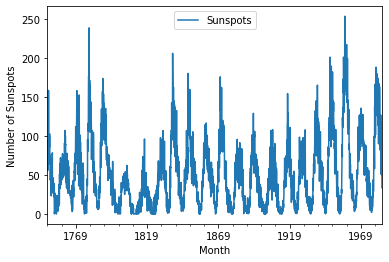

In [7]:
df.plot()
plt.ylabel("Number of Sunspots")

In [8]:
rolling_mean=df.rolling(7).mean()
rolling_std=df.rolling(7).std() 
#durağanlığı test etmek-7 aylık ortalama hesaplamak

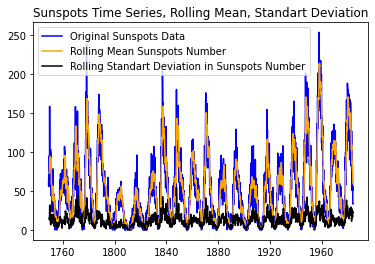

In [9]:
plt.plot(df, color="blue",label="Original Sunspots Data")
plt.plot(rolling_mean, color="orange", label="Rolling Mean Sunspots Number")
plt.plot(rolling_std, color="black", label="Rolling Standart Deviation in Sunspots Number")
plt.title("Sunspots Time Series, Rolling Mean, Standart Deviation")
plt.legend(loc="best")
#grafiğini çizdirdik

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adft = adfuller(df,autolag="AIC")

In [12]:
output_df=pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3],adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                                                                                           "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)
#Verilerimizin durağan olmadığını, p-değerimizin yüzde 5'ten büyük ve test istatistiğinin kritik değerden büyük olması gerçeğinden görebiliriz.

         Values                       Metric
0 -9.567668e+00              Test Statistics
1  2.333452e-16                      p-value
2  2.700000e+01             No. of lags used
3  2.792000e+03  Number of observations used
4 -3.432694e+00          critical value (1%)
5 -2.862576e+00          critical value (5%)
6 -2.567321e+00         critical value (10%)


In [13]:
autocorrelation_lag1 = df['Sunspots'].autocorr(lag=1)
print("One Month Lag: ",autocorrelation_lag1)
#otokorelasyon- 1 aylık gecikme

One Month Lag:  0.9217176860753826


In [14]:
autocorrelation_lag3 = df['Sunspots'].autocorr(lag=3)
print("Three Month Lag: ",autocorrelation_lag3)

autocorrelation_lag6 = df['Sunspots'].autocorr(lag=6)
print("Six Month Lag: ",autocorrelation_lag6)

autocorrelation_lag9 = df['Sunspots'].autocorr(lag=9)
print("Nine Month Lag: ",autocorrelation_lag9)
#otokorelasyon- 3, 6, 9 aylık gecikme

Three Month Lag:  0.8746302087015985
Six Month Lag:  0.8366680914241167
Nine Month Lag:  0.7979995515804387


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

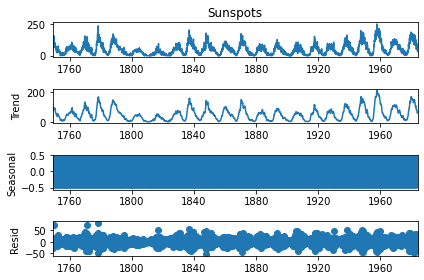

In [16]:
decompose = seasonal_decompose(df['Sunspots'],model='additive',period=7)
decompose.plot()
plt.show()
#mevsimsellik

<ipython-input-17-4b1172c4e001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train']=train['Sunspots']
<ipython-input-17-4b1172c4e001>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test']=test['Sunspots']


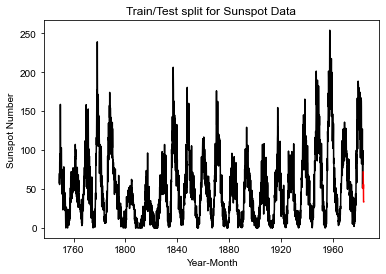

In [17]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1983-08", format='%Y-%m')]
train['train']=train['Sunspots']
del train ['Date']
del train ['Sunspots']
test = df[df['Date'] >= pd.to_datetime("1983-08", format='%Y-%m')]
del test ['Date']
test['test']=test['Sunspots']
del test ['Sunspots']
plt.plot(train, color="black")
plt.plot(test, color="red")
plt.title("Train/Test split for Sunspot Data")
plt.ylabel("Sunspot Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()
#arıma, geçmiş değerlerin doğrusal bir kombinasyonu açısından gelecekteki değerleri tahmin etmemizi sağlar-eğitim ve test için verilerimizi bölelim

In [18]:
from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23461.112, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23999.475, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23733.596, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23572.080, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23997.476, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23530.483, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23529.121, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23460.295, Time=2.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23528.114, Time=1.05 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=23460.026, Time=3.40 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23530.053, Time=0.85 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=23533.124, Time=2.57 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=23532.065, Time=3.74 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=23533.721, Time=1.43 sec
 ARIMA(5,1,1)(0,0,0

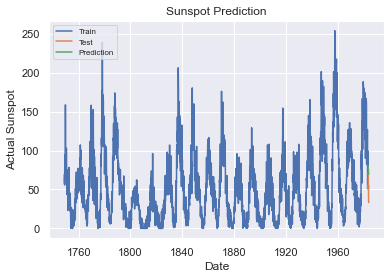

In [19]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Sunspot Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Sunspot')
plt.legend(loc='upper left', fontsize=8)
plt.show()
#grafik için-Tahminlerimiz yeşil, gerçek değerler turuncu

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ",rms)

RMSE:  27.552670755057083
